### Consigna:
* Graficar una serie de  tiempo de los ejemplos del repositorio

* Redactar un informe describiendo tres series de tiempo distintas(máx.3
páginas)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#### Catfish.csv: Venta de bagres a lo largo del tiempo

In [2]:
catfish = pd.read_csv("./Datasets/catfish.csv",  header=0, index_col=0, parse_dates=True)

In [3]:
catfish.head()

,Total
Date,
1986-01-01,9034
1986-02-01,9596
1986-03-01,10558
1986-04-01,9002
1986-05-01,9239


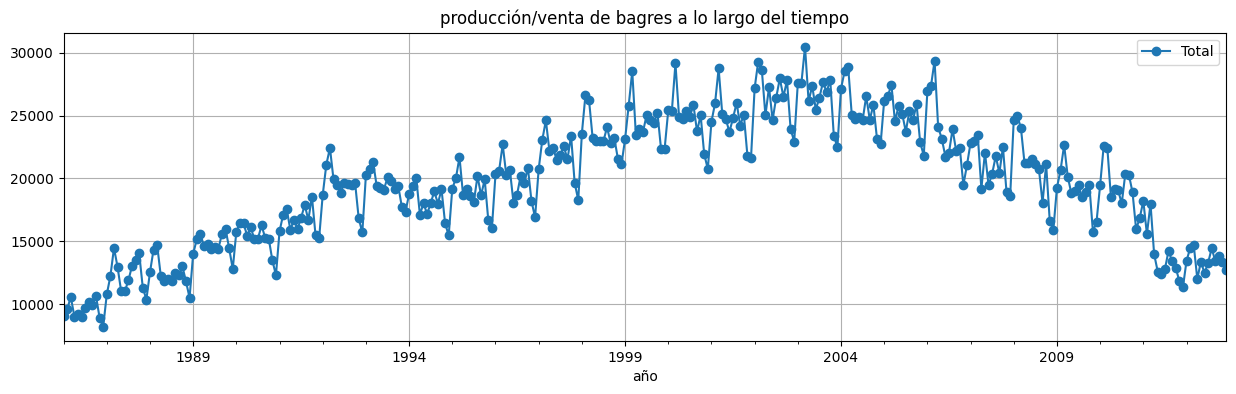

In [4]:
plt.figure(figsize=(15,4))
catfish.plot(marker="o", ax=plt.gca())
plt.title("producción/venta de bagres a lo largo del tiempo")
plt.xlabel("año")
plt.grid(True)

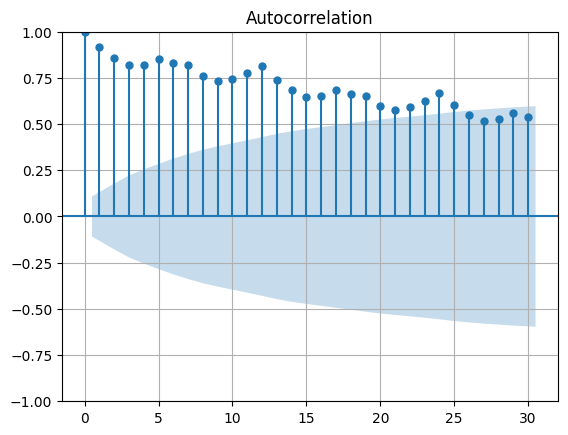

In [6]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(catfish, lags=30)
plt.grid(True)
plt.show()

##### Conclusiones

* Se observa que es una serie de tiempo discreta, univariada y no estacionaria.
* Se observa una autocorrelacion alta. Ciclos con frecuencia determinada cada 12 meses
* Tendencia decreciente
* No parece seguir un random walk por la estructura de autocorrelación que tiene 



#### BYMA: cotización de la bolsa de valores de Argentina


In [7]:
byma = pd.read_csv(
    "./Datasets/BYMA.csv",  header=0, index_col=0, 
)

byma.fechaHora = pd.to_datetime(byma.fechaHora, infer_datetime_format=True)
byma = byma.set_index("fechaHora")

/var/folders/30/4fg_jqmn6t5bqy5p8vdxjmpr0000gp/T/ipykernel_890/2074999271.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  byma.fechaHora = pd.to_datetime(byma.fechaHora, infer_datetime_format=True)


<Axes: xlabel='fechaHora'>

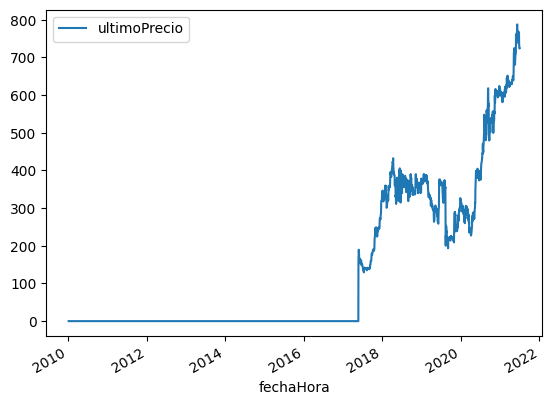

In [8]:
byma.plot()

In [9]:
num_zeros = (byma.ultimoPrecio == 0.0).sum().sum()
num_zeros

1773

In [10]:
# Borramos los que son 0.0
byma = byma[(byma != 0.0).all(axis=1)]
len(byma)

998

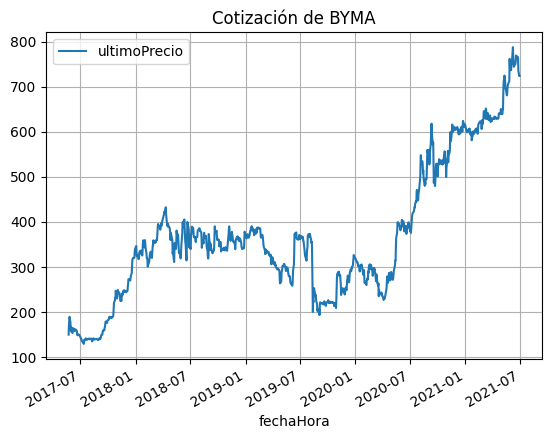

In [11]:
byma.plot()
plt.title("Cotización de BYMA")
plt.grid(True)

##### Conclusiones

* Se observa que es una serie de tiempo discreta, univariada, no estacionaria y no estacional.
* Se ve  una tendencia alcista apartir de julio 2020.
* Aparenta segiur un proceso de random walk

#### Estadisticas de temperatura



In [12]:
temp = pd.read_csv("./Datasets/new_estadisticas.txt", sep="\t", encoding="latin-1")

In [13]:
temp
temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 608 entries, 0 to 607
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Estaciï¿½n      608 non-null    object
 1   Valor Medio de  608 non-null    object
 2   Ene             608 non-null    object
 3   Feb             608 non-null    object
 4   Mar             608 non-null    object
 5   Abr             608 non-null    object
 6   May             608 non-null    object
 7   Jun             608 non-null    object
 8   Jul             608 non-null    object
 9   Ago             608 non-null    object
 10  Sep             608 non-null    object
 11  Oct             608 non-null    object
 12  Nov             608 non-null    object
 13  Dic             608 non-null    object
dtypes: object(14)
memory usage: 66.6+ KB


In [14]:
# Convertir a float

for col in temp.columns[2:]:
    temp[col] = pd.to_numeric(temp[col], errors="coerce")

temp.fillna(np.nan, inplace=True)

In [15]:
# renombro columnas

temp.columns = ["est", "val", 1,2,3,4,5,6,7,8,9,10,11,12]

In [16]:
metrics = [ 
("precipitacion", temp[(temp["val"] == "Precipitaciï¿½n (mm)")]),
("temperatura_media",  temp[(temp["val"] == "Temperatura (ï¿½C)")]),
("temperatura_maxima", temp[(temp["val"] == "Temperatura mï¿½xima (ï¿½C)")]),
("temperatura_minima", temp[(temp["val"] == "Temperatura mï¿½nima (ï¿½C)")]),
("humedad_relativa", temp[(temp["val"] == "Humedad relativa (%)")]),
("velocidad_viento", temp[(temp["val"] == "Velocidad del Viento (km/h)")]),
("nubosidad_total", temp[(temp["val"] == "Nubosidad total (octavos)")]),
("frecuencia_precipitacion",  temp[(temp["val"] == "Frecuencia de dï¿½as con Precipitaciï¿½n superior a 0.1 mm")]) ]   

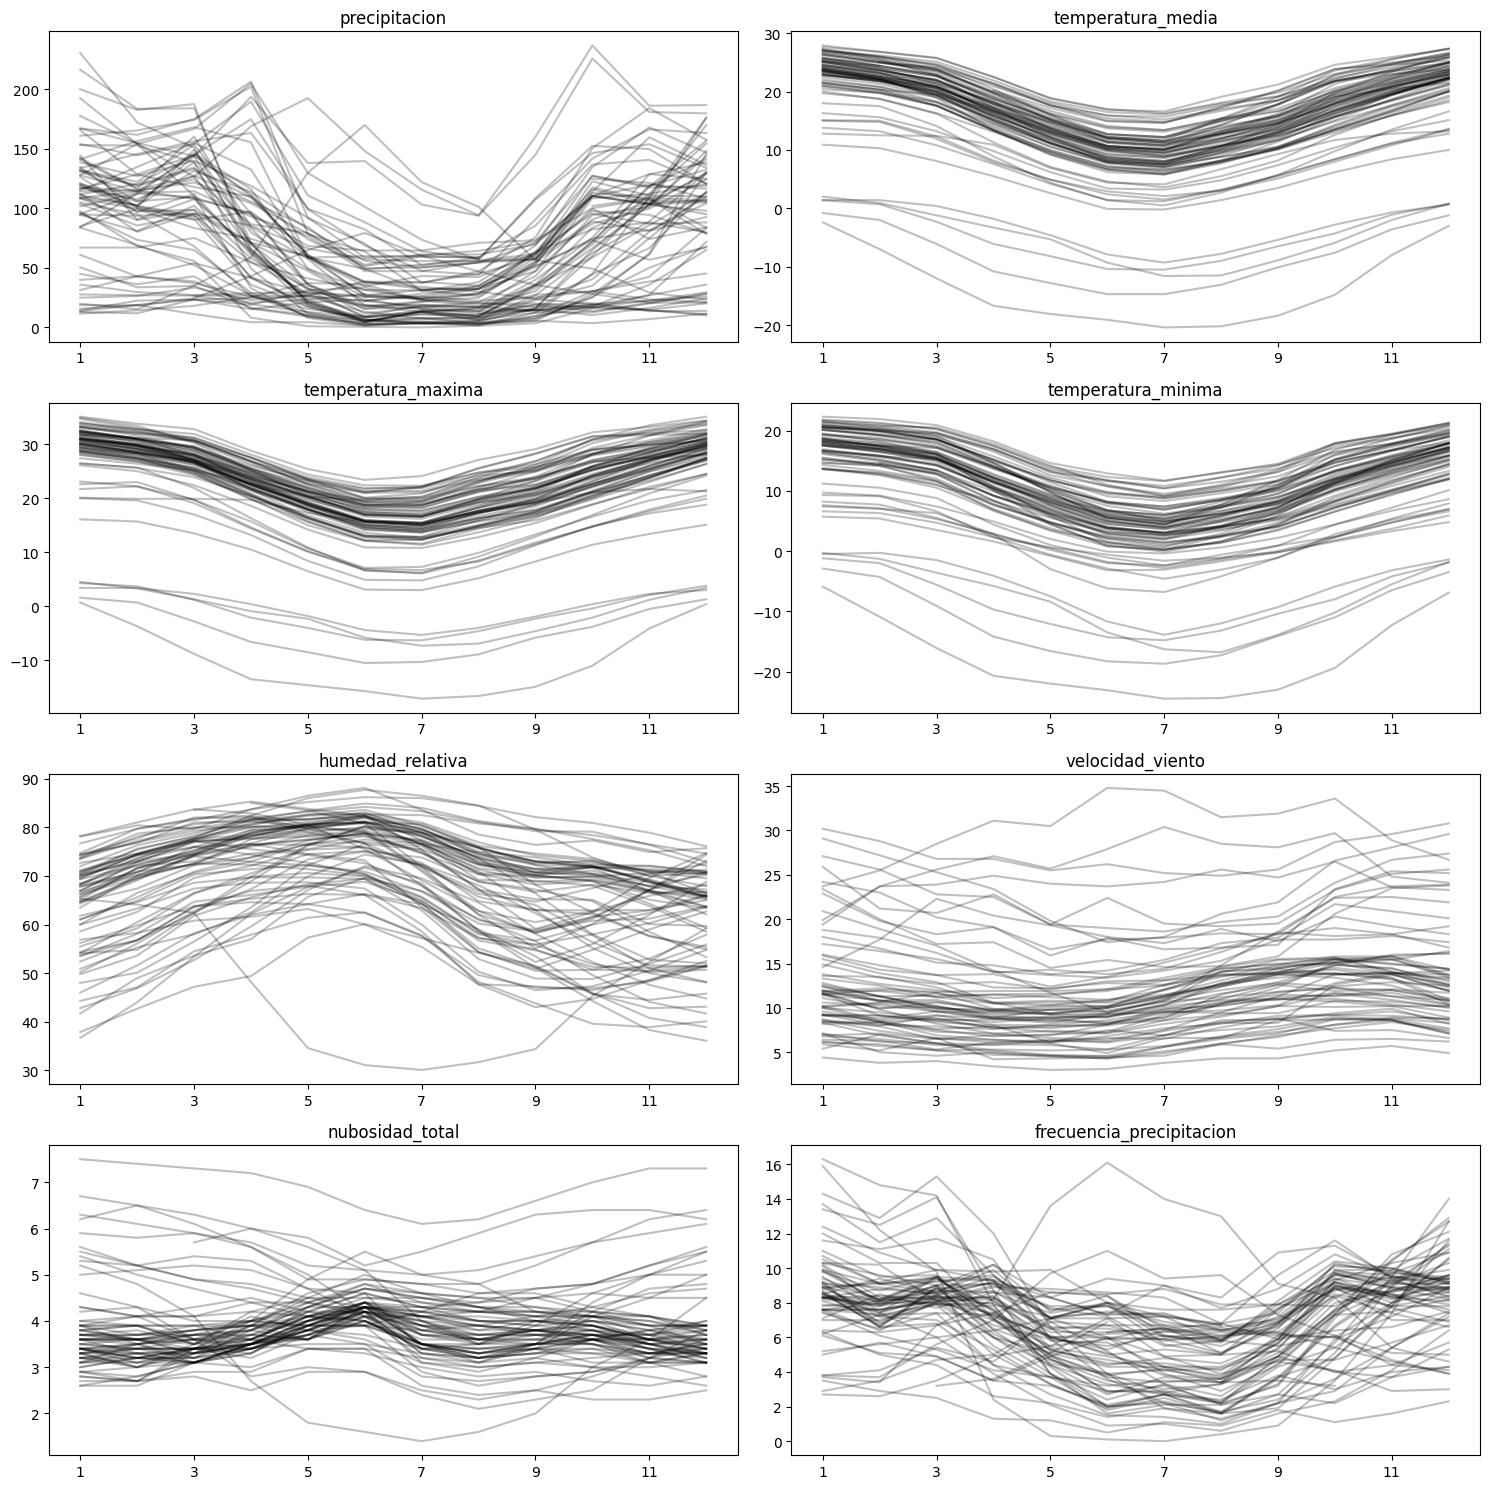

In [17]:
fig, axs = plt.subplots(nrows=len(metrics)//2, ncols=2, figsize=(15, 15))

for i, (metric_name, filtered_data) in enumerate(metrics):
    ax = axs[i // 2, i % 2]
    filtered_data.T[2:].plot(ax=ax, color="k", legend=False, alpha=0.25)
    ax.set_title(metric_name)
plt.tight_layout()
plt.show()

In [18]:
def plot_metrics_by_location(location, metrics):
    for metric_name, df in metrics:
        plt.figure(figsize=(10, 6))
        months = df.columns[2:] 
        
        data = df[df['est'] == location].iloc[:, 2:].values.flatten()
        
        plt.plot(months, data, label=metric_name)
        
        # Customize plot
        plt.title(f"{metric_name} - {location}")
        plt.xlabel('Month')
        plt.ylabel(metric_name)
        plt.legend(loc='upper right')
        plt.xticks(rotation=45)  
        plt.tight_layout(pad=3.0)
        
        plt.show() 

In [19]:
def plot_combined_metrics_for_location(location, metrics):
    plt.figure(figsize=(10, 6))
    months = metrics[0][1].columns[2:]
    lines = [] 
    labels = []
    
    for metric_name, df in metrics:
        if metric_name in ["temperatura_media", "temperatura_maxima", "temperatura_minima"]:
            data = df[df['est'] == location].iloc[:, 2:].values.flatten()
            line, = plt.plot(months, data, label=metric_name)
            lines.append(line)
            labels.append(metric_name)
    
    # precipitacion en segundo y axis
    for metric_name, df in metrics:
        if metric_name == "precipitacion":
            data = df[df['est'] == location].iloc[:, 2:].values.flatten()
            ax = plt.gca().twinx()
            line, = ax.plot(months, data, label=metric_name, color='red')
            lines.append(line)
            labels.append("Precipitacion (mm)")
            ax.set_ylabel('Precipitacion (mm)', color='red')
            ax.tick_params(axis='y', labelcolor='red')
    
    plt.title(f"Estadística temperatura - {location}")
    plt.xlabel('mes')
    plt.ylabel('Temperature (°C)')
    plt.xticks(rotation=45)
    
    plt.legend(lines, labels, loc='upper left')
    
    plt.tight_layout(pad=3.0) 
    plt.show()


In [22]:
temp.tail(20)

,est,val,1,2,3,4,5,6,7,8,9,10,11,12
588,BASE BELGRANO II,Velocidad del Viento (km/h),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,BASE BELGRANO II,Nubosidad total (octavos),5.4,5.0,4.7,4.4,4.1,3.9,4.2,4.6,4.7,4.8,5.0,5.0
590,BASE BELGRANO II,Precipitaciï¿½n (mm),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
591,BASE BELGRANO II,Frecuencia de dï¿½as con Precipitaciï¿½n super...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
592,BASE MARAMBIO,Temperatura (ï¿½C),-0.8,-2.0,-6.1,-10.8,-12.8,-14.7,-14.7,-13.1,-10.1,-7.6,-3.6,-1.2
593,BASE MARAMBIO,Temperatura mï¿½xima (ï¿½C),1.6,0.7,-2.8,-6.6,-8.5,-10.5,-10.3,-8.9,-5.8,-3.8,-0.5,1.3
594,BASE MARAMBIO,Temperatura mï¿½nima (ï¿½C),-2.9,-4.3,-9.1,-14.2,-16.6,-18.3,-18.7,-17.3,-14.1,-11.0,-6.5,-3.5
595,BASE MARAMBIO,Humedad relativa (%),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
596,BASE MARAMBIO,Velocidad del Viento (km/h),23.7,25.5,28.5,31.1,30.5,34.8,34.5,31.5,31.9,33.6,28.9,26.7
597,BASE MARAMBIO,Nubosidad total (octavos),6.7,6.5,6.1,5.6,4.9,4.9,4.8,4.8,5.2,5.7,6.2,6.4


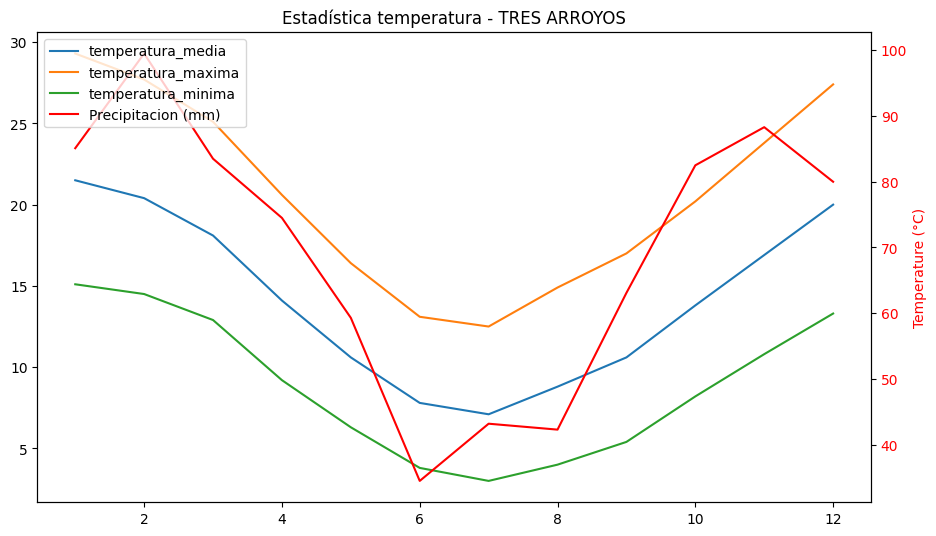

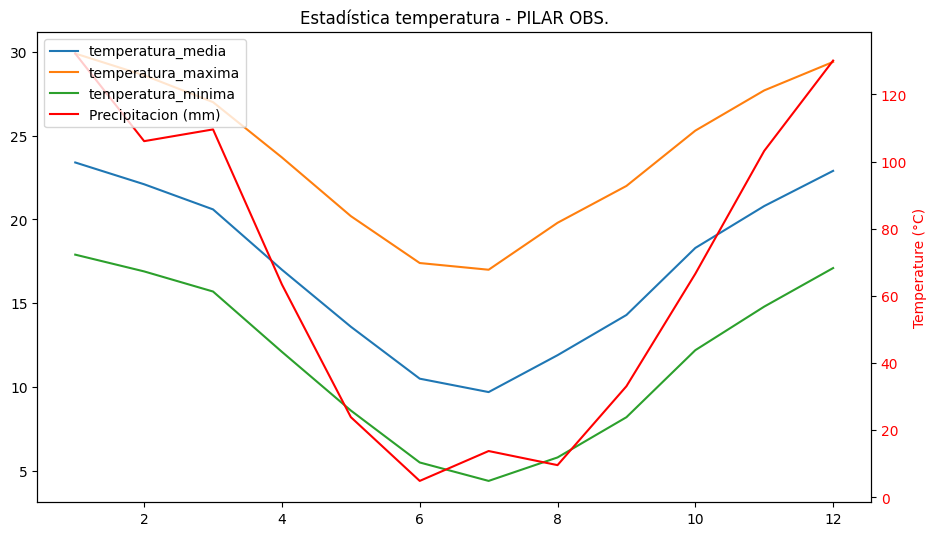

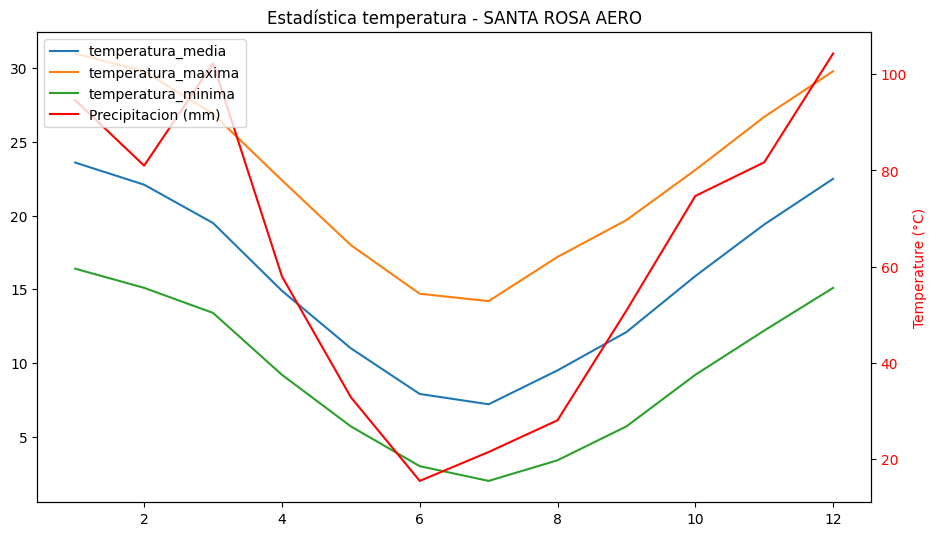

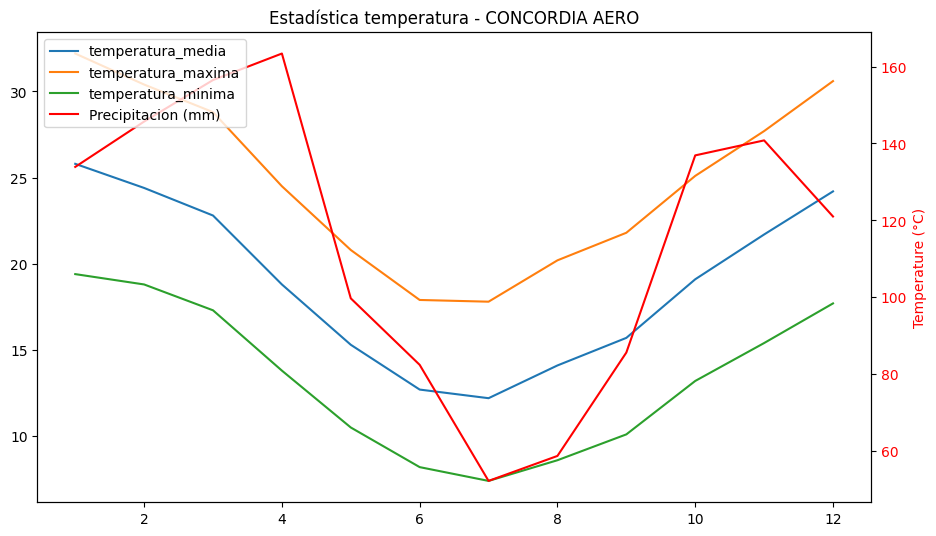

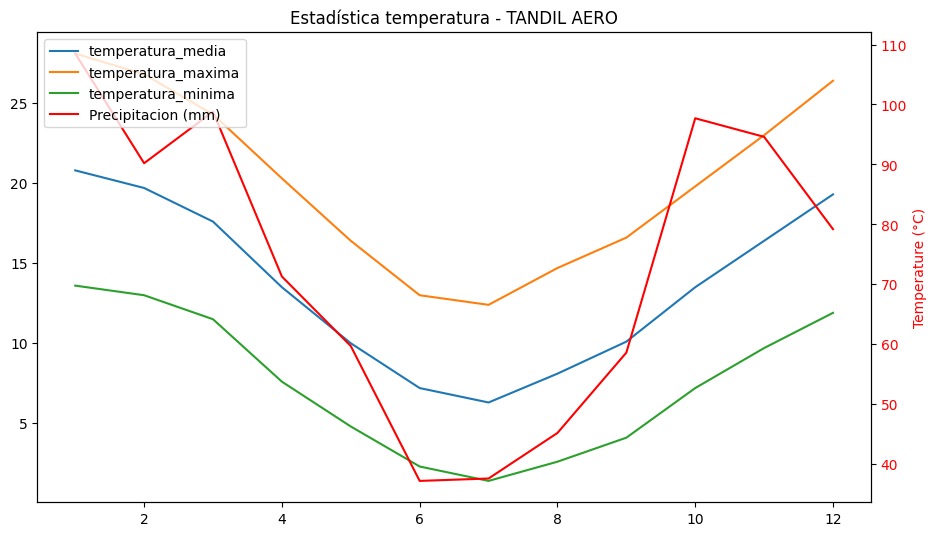

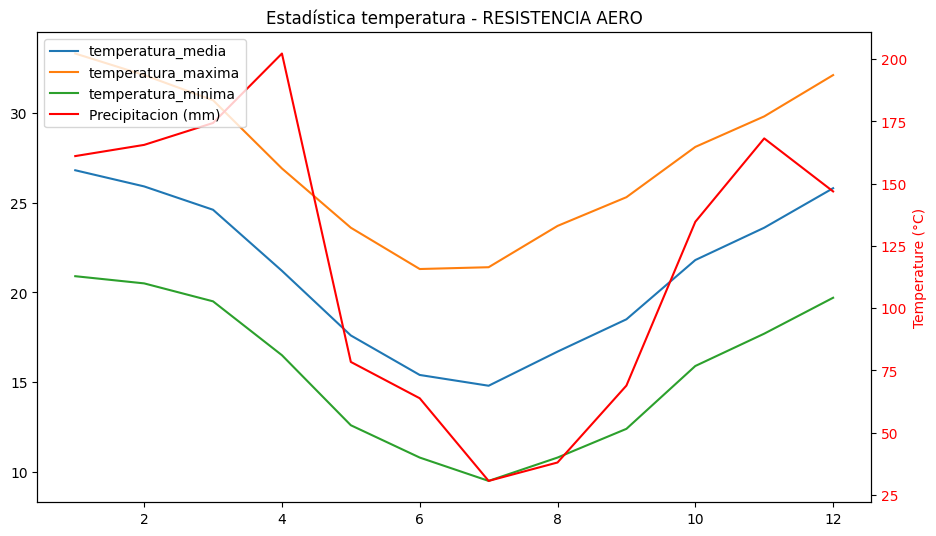

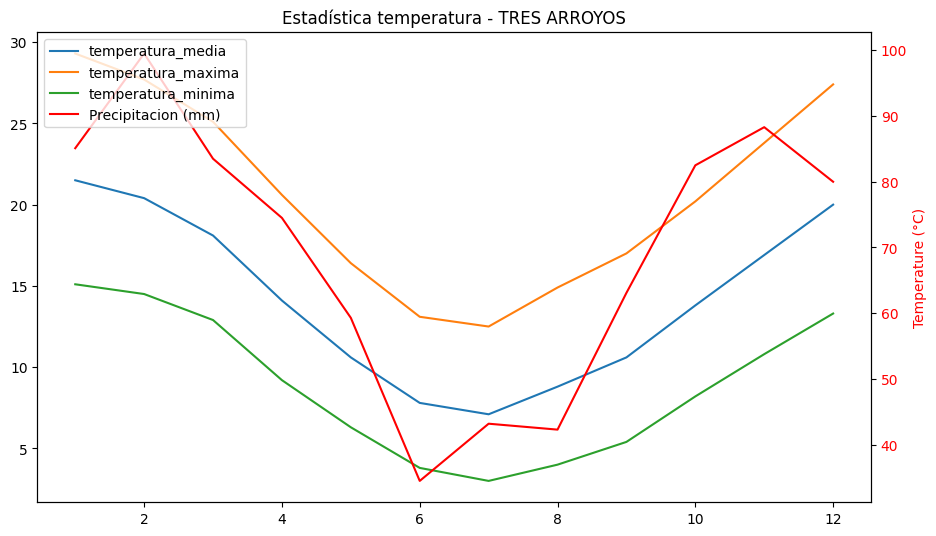

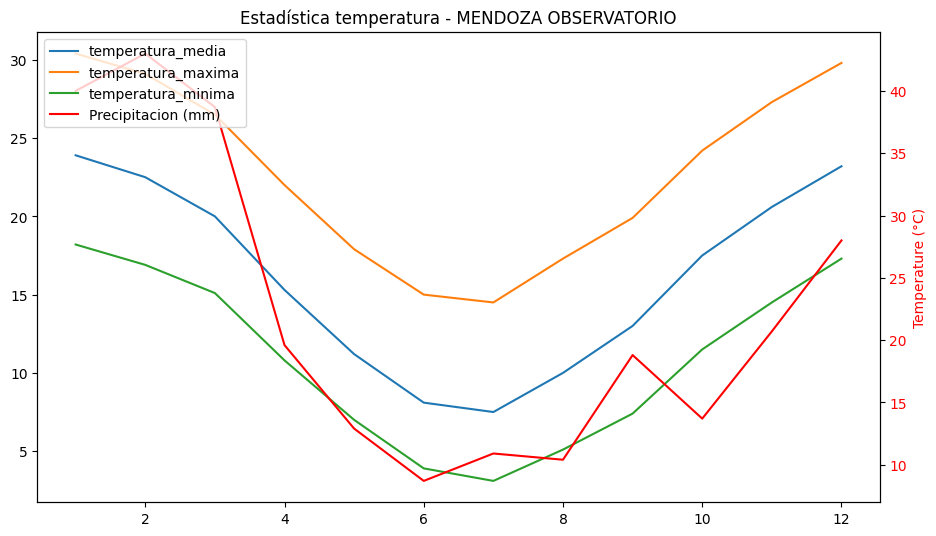

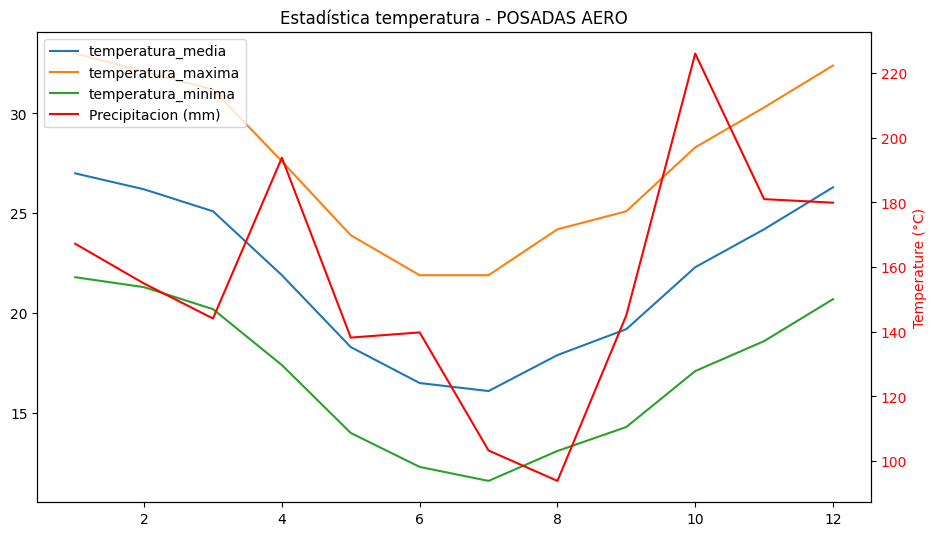

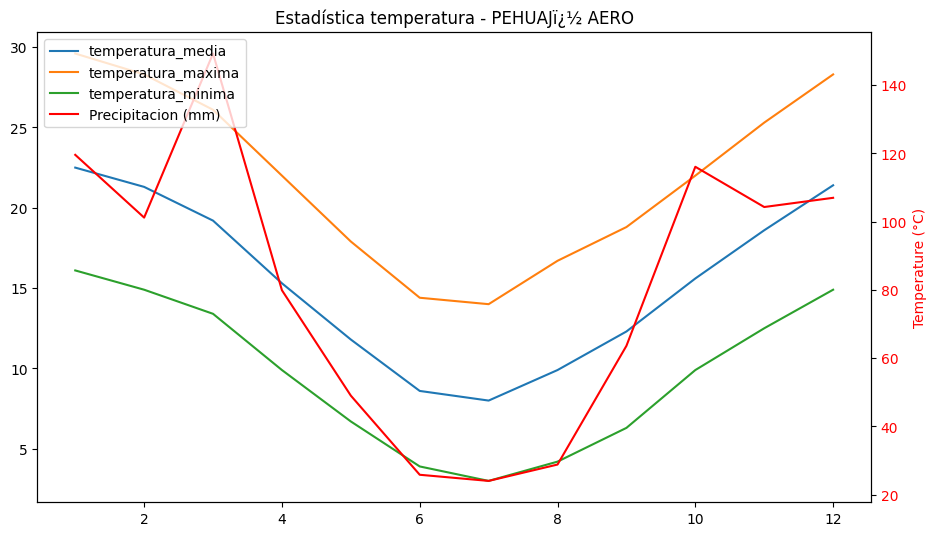

In [32]:
location_to_plot = "LA QUIACA OBS."  

for i in range(10):
    location_to_plot = temp.sample().est.iloc[0]
    plot_combined_metrics_for_location(location_to_plot, metrics)

#### Conclusiones

Tratamos cada una de estas series de tiempo como univariadas y discretas.

Observamos que se mantiene cierta estacionalidad en los distintos gráficos y que se trata de procesos no estacionarios.

Observamos también cómo a medida que baja la temperatura durante los meses de invierno, disminuyen las precipitaciones. 


In [25]:
location_to_plot = "LA QUIACA OBS." 
#plot_metrics_by_location(location_to_plot, metrics)


In [23]:
from sklearn.cluster import KMeans

def calculate_kmeans(metrics):

    kmeans_results = {}
    for metric_name, df in metrics:
        matriz = df.dropna()[df.columns[2:]]
        km = KMeans(n_clusters=3)
        km.fit(matriz)

        kmeans_results[metric_name] = km.labels_
    
    return kmeans_results

In [24]:
kmeans_labels = calculate_kmeans(metrics)

In [25]:
def plot_clustered_data(kmeans_labels, metrics, metric_name, cluster_number):
    plt.figure(figsize=(10, 6))
    
    cluster_labels = kmeans_labels[metric_name]
    
    metric_df = next((df for name, df in metrics if name == metric_name), None)
    if metric_df is None:
        print("Metric not found.")
        return
    
    months = metric_df.columns[2:]
    
    matriz = metric_df.dropna()[metric_df.columns[2:]]
    
    cluster_data = matriz[cluster_labels == cluster_number].T
    plt.plot(months, cluster_data, label=f"Cluster {cluster_number}", alpha=0.5)
    
    plt.title(f"Clustering  {metric_name}, Cluster {cluster_number}")
    plt.xlabel("Mes")
    plt.ylabel("Valor")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

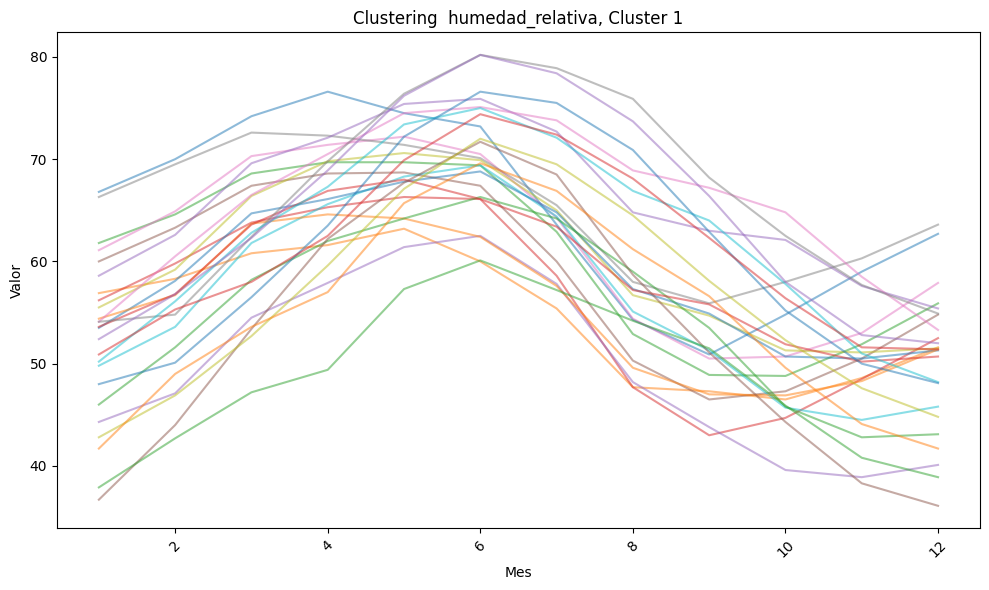

In [26]:
plot_clustered_data(kmeans_labels, metrics, 'humedad_relativa', 1)